In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
x = np.array(np.arange(1,13))
x = x.reshape(4,3)
y = np.array([1,-1,1,-1])
x,y

(array([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]),
 array([ 1, -1,  1, -1]))

In [3]:
factor = 2
t1 = np.matmul(np.transpose(x), x) + factor * np.identity(x.shape[1])
np.linalg.inv(t1)

array([[ 0.24161074, -0.15436242, -0.05033557],
       [-0.15436242,  0.33473154, -0.1761745 ],
       [-0.05033557, -0.1761745 ,  0.19798658]])

In [4]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
def closed_form(X, Y, lambda_factor):
    X_transpose = np.transpose(X)
    t1 = np.matmul(X_transpose, X) + lambda_factor * np.identity(X.shape[1])
    t2 = np.matmul(np.linalg.inv(t1), X_transpose)
    theta = np.matmul(t2, Y)
    return theta

In [6]:
theta_1 = closed_form(x, y, 2)
theta_1

array([-0.22147651, -0.02516779,  0.17114094])

In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [8]:
clf = SVC(kernel="linear", random_state=0, C=0.1)
clf.fit(x,y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
y_pred = clf.predict(x)
accuracy_score(y, y_pred)

0.5

In [10]:
clf2 = LinearSVC(random_state=0, C=0.1)
clf2.fit(x,y)
y_pred2 = clf2.predict(x)
accuracy_score(y, y_pred2)

0.75

In [11]:
#help(LinearSVC)

In [12]:
clf3 = LinearSVC(random_state=0, multi_class='ovr')
clf3.fit(x,y)
y_pred3 = clf3.predict(x)
accuracy_score(y, y_pred3)

/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5

In [13]:
theta = theta_1.reshape(3,1)

In [14]:
tau = 0.5
t1 = np.matmul(x, theta)
np.exp(t1)

array([[1.27329845],
       [1.01521526],
       [0.80944262],
       [0.64537776]])

In [15]:
def compute_prob(X, theta, temp_parameter):
    t1 = np.matmul(theta, np.transpose(X))/temp_parameter
    c = np.max(t1, axis=0)
    t1 = t1 - c
    numerator = np.exp(t1)
    denominator = np.sum(numerator, axis=0)
    return numerator / denominator

In [16]:
#compute_prob(x, theta, tau)

In [17]:
#help(np.max)

In [18]:
def check_compute_probabilities():
    ex_name = "Compute probabilities"
    n, d, k = 3, 5, 7
    X = np.arange(0, n * d).reshape(n, d)
    zeros = np.zeros((k, d))
    temp = 0.2
    exp_res = np.ones((k, n)) / k

    theta = np.arange(0, k * d).reshape(k, d)
    ans = compute_prob(X, theta, temp)
    exp_res = np.zeros((k, n))
    exp_res[-1] = 1
    
    return exp_res, ans

In [ ]:
def compute_cost_function(X, Y, theta, lambda_factor, temp_parameter):
    h = compute_prob(X, theta, temp_parameter)
    

In [29]:
exp_res, ans = check_compute_probabilities()
exp_res, ans

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]]),
 array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [7.12457641e-218, 0.00000000e+000, 0.00000000e+000],
        [2.66919022e-109, 0.00000000e+000, 0.00000000e+000],
        [1.00000000e+000, 1.00000000e+000, 1.00000000e+000]]))

In [19]:
from scipy.special import softmax

def prob3():
    ex_name = "Compute probabilities"
    n, d, k = 3, 5, 7
    X = np.arange(0, n * d).reshape(n, d)
    zeros = np.zeros((k, d))
    temp = 0.2
    exp_res = np.ones((k, n)) / k

    exp_res[-1] = 1
    ans = softmax(X)
    return ans

prob3()

array([[5.25626559e-07, 1.42880112e-06, 3.88388413e-06, 1.05574917e-05,
        2.86982378e-05],
       [7.80098982e-05, 2.12052889e-04, 5.76419514e-04, 1.56687069e-03,
        4.25919613e-03],
       [1.15776954e-02, 3.14714391e-02, 8.55482410e-02, 2.32544229e-01,
        6.32120752e-01]])

In [20]:
x1 =np.arange(1,13).reshape(4,3)
x1

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [21]:
t1 = np.linalg.norm(x, axis=1)
print(t1, max(t1))

[ 3.74165739  8.77496439 13.92838828 19.10497317] 19.1049731745428


In [22]:
14**0.5

3.7416573867739413

In [23]:
#help(np.sum)

In [24]:
print(x)
np.max(x, axis=0), np.max(x, axis=1)
t4 = np.max(x, axis=1)
t5 = t4[:, np.newaxis]
print(t4, t5)
x-t5

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 3  6  9 12] [[ 3]
 [ 6]
 [ 9]
 [12]]


array([[-2, -1,  0],
       [-2, -1,  0],
       [-2, -1,  0],
       [-2, -1,  0]])

In [25]:
print(x)
np.max(x, axis=0)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


array([10, 11, 12])

In [27]:
np.sum(x, axis=0)

array([22, 26, 30])

In [32]:
y[1]

-1

In [33]:
x[2][1]

8

In [34]:
x[2,1]

8

In [45]:
import scipy.sparse as sparse
from scipy.sparse import coo_matrix

In [46]:
x = np.arange(1,13).reshape(4,3)
Y = np.array([1,2,3,4])
x,Y

(array([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]),
 array([1, 2, 3, 4]))

In [49]:
def with_sparse(indices, k):
    n = len(indices)
    M = sparse.coo_matrix(([1]*n, (Y, range(n))), shape=(k,n)).toarray()
    return M

with_sparse(Y, 5)

array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [54]:
def naive(indices, k):
    mat = [[1 if i==j else 0 for j in range(k)] for i in indices]
    return np.array(mat).T

K = 6
N = 10
Y = np.random.randint(0, 5, size=N)
naive(Y, K), Y
with_sparse(Y,K)

array([[0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [53]:
#help(sparse.coo_matrix)

In [58]:
def run_gradient_descent_iteration(X, Y, theta, alpha, lambda_factor, temp_parameter):
    n = len(Y)
    k = theta.shape[0]
    h_x = compute_prob(X, theta, temp)
    M = sparse.coo_matrix(([1]*n, (Y, range(n))), shape(k, n)).toarray()
    t1 = np.matmul((M - h_x), X) * -1/(temp_parameter * n)
    delta_J = t1 + lambda_factor * theta
    return (theta - alpha * delta_J)

In [56]:
len(Y)

10

In [59]:
def update_y(train_y, test_y):
    train_y_mod3 = train_y % 3
    test_y_mod3 = test_y % 3
    return train_y_mod3, test_y_mod3

In [64]:
#help(np.random)
y1 = np.random.randint(9, size =6)
y2 = np.random.randint(9, size=4)
print(y1, y2)
print(update_y(y1,y2))

[1 1 2 7 2 5] [4 2 5 2]
(array([1, 1, 2, 1, 2, 2]), array([1, 2, 2, 2]))


In [5]:
x = np.arange(1,7).reshape(3,2)
d = np.average(x,axis=0)
y = x-d
x, d, y

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 array([3., 4.]),
 array([[-2., -2.],
        [ 0.,  0.],
        [ 2.,  2.]]))

In [6]:
x = np.arange(1,13). reshape(3,4)
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [8]:
y = x[:,np.arange(0,2)]
y

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [23]:
result = np.empty([1,2])
result.shape

(1, 2)

In [29]:
for i in np.arange(0,4):
    for j in np.arange(0,4):
        if (i+j <=3):
            
            print(i,j)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
2 0
2 1
3 0


In [14]:
#help(np.vstack)

In [28]:
a1 = np.empty([1,2])
a1 = np.append(a1, [3,4])
a1

array([3., 4., 3., 4.])

In [3]:
x = np.arange(1,5).reshape(2,2)
x

array([[1, 2],
       [3, 4]])

In [5]:
x**2

array([[ 1,  4],
       [ 9, 16]])

In [13]:
y = np.arange(2,9,2).reshape(2,2)
print(x, '\n',y, '\n',x-y)
np.linalg.norm(x-y)

[[1 2]
 [3 4]] 
 [[2 4]
 [6 8]] 
 [[-1 -2]
 [-3 -4]]


5.477225575051661

In [17]:
x = np.arange(1,7).reshape(3,2)
x,y

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 array([[2, 4],
        [6, 8]]))

In [18]:
np.einsum('ijk, ijk->ij', x-y, x-y)

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

In [19]:
np.sum(x, axis=0)

array([ 9, 12])

In [20]:
np.sum(x, axis=1)

array([ 3,  7, 11])

In [29]:
def rbf_kernel(X, Y, gamma):
    px = np.sum(X**2, axis=1)[:, np.newaxis]
    py = np.sum(Y**2, axis=1)
    pxy = -2 * np.dot(X, np.transpose(Y))
    t1 = px + py + pxy
    return t1

print(x, y)
rbf_kernel(x, y, 1)

[[1 2]
 [3 4]
 [5 6]] [[2 4]
 [6 8]]


array([[ 5, 61],
       [ 1, 25],
       [13,  5]])

In [30]:
print(x, '\n', y)
px = np.sum(x**2, axis=1)[:, np.newaxis]
print(px)
py = np.sum(y**2, axis=1)
print(py)
pxy = -2 * np.dot(x, np.transpose(y))
print(pxy)
tt = px + py + pxy
print(tt)

[[1 2]
 [3 4]
 [5 6]] 
 [[2 4]
 [6 8]]
[[ 5]
 [25]
 [61]]
[ 20 100]
[[ -20  -44]
 [ -44 -100]
 [ -68 -156]]
[[ 5 61]
 [ 1 25]
 [13  5]]


In [27]:
np.sum(x**2, axis=1)

array([ 5, 25, 61])

In [3]:
x = np.arange(1,10).reshape(3,3)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [4]:
np.linalg.eig(x)

(array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16]),
 array([[-0.23197069, -0.78583024,  0.40824829],
        [-0.52532209, -0.08675134, -0.81649658],
        [-0.8186735 ,  0.61232756,  0.40824829]]))

In [5]:
y = np.arange(1,7).reshape(3,2)
y

array([[1, 2],
       [3, 4],
       [5, 6]])

In [6]:
np.dot(x,y)

array([[ 22,  28],
       [ 49,  64],
       [ 76, 100]])

In [2]:
x1 = np.array([-1,-1])
x2 = np.array([1,-1])
x3 = np.array([-1,1])
x4 = np.array([1,1])
x = np.array([x1,x2,x3,x4])
x

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

In [4]:
y = np.array([1,-1,-1,1])

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

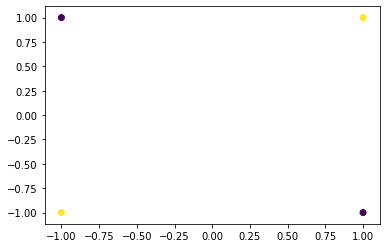

In [9]:
plt.scatter(x[:,0],x[:,1], c= y)

In [64]:
m1 = np.array([1, 0, -1])

[ True False False]


In [81]:
def f(Z):
    return np.tanh(Z)

In [82]:
def f_1(w, w0, X):
    z = np.matmul(X, w) + w0
    return f(z)

In [83]:
def new_f(W1, W2, W0, X):
    w1 = W1.reshape(2,1)
    w2 = W2.reshape(2,1)
    w0 = W0
    f1 = f_1(w1, w0, X)
    f2 = f_1(w2, w0, X)
    f3 = np.hstack((f1, f2))
    return f3

[[ 0.76159416  0.76159416]
 [ 0.99505475 -0.76159416]
 [-0.76159416  0.99505475]
 [ 0.76159416  0.76159416]]


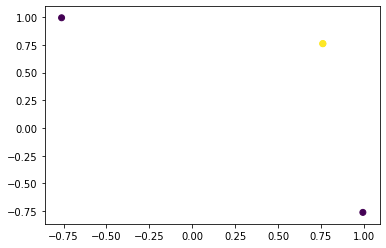

In [84]:
w1 = np.array([1,-1])
w2 = np.array([-1,1])
w0 = 1
ans = new_f(w1, w2, w0, x)
print(ans)
plt.scatter(ans[:,0], ans[:,1], c=y)

In [28]:
w1 = np.array([2,2]).reshape(2,1)
w2 = np.array([-2,-2]).reshape(2,1)
w0 = 1
t1 = f_1(w1,w0,x)
t1

array([[-9],
       [-1],
       [-1],
       [ 7]])

In [29]:
t2 = f_1(w2, w0, x)
t2

array([[ 7],
       [-1],
       [-1],
       [-9]])

In [38]:
t3 = np.hstack((t1, t2))
t3

array([[-9,  7],
       [-1, -1],
       [-1, -1],
       [ 7, -9]])

In [35]:
help(np.hstack)

Help on function hstack in module numpy:

hstack(tup)
    Stack arrays in sequence horizontally (column wise).
    
    This is equivalent to concatenation along the second axis, except for 1-D
    arrays where it concatenates along the first axis. Rebuilds arrays divided
    by `hsplit`.
    
    This function makes most sense for arrays with up to 3 dimensions. For
    instance, for pixel-data with a height (first axis), width (second axis),
    and r/g/b channels (third axis). The functions `concatenate`, `stack` and
    `block` provide more general stacking and concatenation operations.
    
    Parameters
    ----------
    tup : sequence of ndarrays
        The arrays must have the same shape along all but the second axis,
        except 1-D arrays which can be any length.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays.
    
    See Also
    --------
    stack : Join a sequence of arrays along a new axis.
    vstack : Stac